In [2]:
import pandas as pd

geocode_full = pd.read_csv('geocode_full.csv')
geocode_full.head()

,RecordID,Address,City,State,Zip,Country,Latitude,Longitude
0,1,515 E Peltason Dr,Irvine,CA,92617,United States,-117.836949,33.643558
1,2,4 Alcott Ct,Irvine,CA,92617,United States,-117.841190,33.640281
2,3,16 Joyce Ct,Irvine,CA,92617,United States,-117.841237,33.634865
3,4,11 Murasaki St,Irvine,CA,92617,United States,-117.835357,33.640612
4,5,10 Whistler Ct,Irvine,CA,92617,United States,-117.840356,33.635310


In [12]:
# Swap Latitude and Longitude Columns
geocode_full.rename(columns={'Latitude': 'Longitude_temp', 'Longitude': 'Latitude'}, inplace=True)
geocode_full.rename(columns={'Longitude_temp': 'Longitude'}, inplace=True)

geocode_full.head()

,RecordID,Address,City,State,Zip,Country,Longitude,Latitude
0,1,515 E Peltason Dr,Irvine,CA,92617,United States,-117.836949,33.643558
1,2,4 Alcott Ct,Irvine,CA,92617,United States,-117.841190,33.640281
2,3,16 Joyce Ct,Irvine,CA,92617,United States,-117.841237,33.634865
3,4,11 Murasaki St,Irvine,CA,92617,United States,-117.835357,33.640612
4,5,10 Whistler Ct,Irvine,CA,92617,United States,-117.840356,33.635310


## Visualize Streetmap

Visualize Streetmap with zipcode borders and address points

In [9]:
!pip install contextily
!pip install shapely

   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ---- ----------------------------------- 3.1/25.5 MB 16.8 MB/s eta 0:00:02
   ---------- ----------------------------- 6.8/25.5 MB 16.8 MB/s eta 0:00:02
   ---------------- ----------------------- 10.2/25.5 MB 16.8 MB/s eta 0:00:01
   --------------------- ------------------ 13.9/25.5 MB 17.1 MB/s eta 0:00:01
   --------------------------- ------------ 17.6/25.5 MB 17.3 MB/s eta 0:00:01
   ------------------------------- -------- 20.2/25.5 MB 16.3 MB/s eta 0:00:01
   ------------------------------------- -- 23.9/25.5 MB 16.6 MB/s eta 0:00:01
   ---------------------------------------  25.4/25.5 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 25.5/25.5 MB 15.1 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\python3.11\lib\site-packages\asttokens-2.4.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python3.11\lib\site-packages\colorama-0.4.6-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python3.11\lib\site-packages\decorator-5.1.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python3.11\lib\site-packages\executing-2.0.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replaceme

DEPRECATION: Loading egg at c:\python3.11\lib\site-packages\asttokens-2.4.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python3.11\lib\site-packages\colorama-0.4.6-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python3.11\lib\site-packages\decorator-5.1.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python3.11\lib\site-packages\executing-2.0.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replaceme

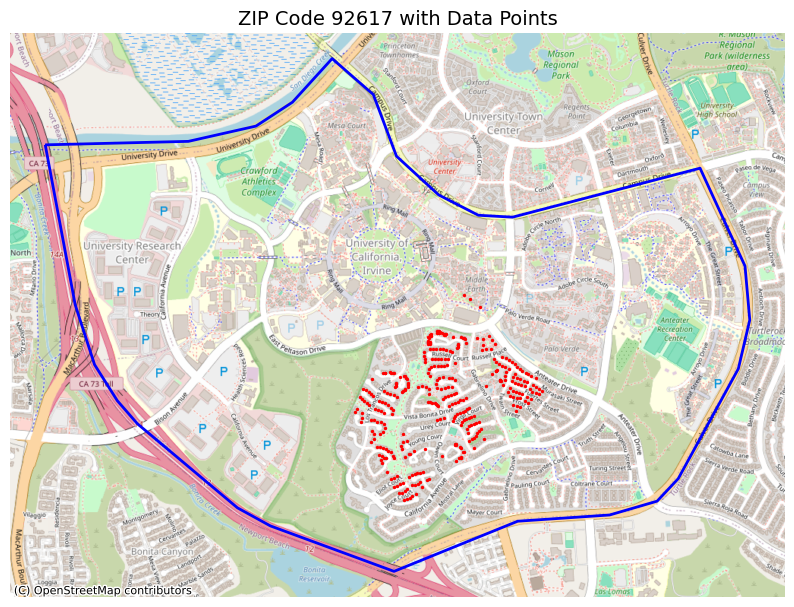

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Read zipcode=92617 
gdf_92617 = gpd.read_file("uci_zip_boundary.geojson")

df_points = pd.DataFrame({
    'recordid':  geocode_full['RecordID'],
    'lon':        geocode_full['Longitude'],
    'lat':        geocode_full['Latitude'],
})

geometry = [Point(lon, lat) for lon, lat in zip(df_points['lon'], df_points['lat'])]

#print(geometry)
# Convert to GeoDataFrame
gdf_points = gpd.GeoDataFrame(df_points, geometry=geometry, crs='EPSG:4326')

# Reproject to EPSG:3857
gdf_points = gdf_points.to_crs(epsg=3857)

# Create Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot ZIP boundary
gdf_92617.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=2)

# Plot data points
gdf_points.plot(ax=ax, color='red', markersize=2)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize
ax.set_title("ZIP Code 92617 with Data Points", fontsize=14)
ax.set_axis_off()

plt.show()


In [20]:
# Check the distribution of latitude, longitude points
df_points.head()
#df_points[['latitude', 'longitude']].describe()

,recordid,lon,lat
0,1,-117.836949,33.643558
1,2,-117.841190,33.640281
2,3,-117.841237,33.634865
3,4,-117.835357,33.640612
4,5,-117.840356,33.635310


In [21]:
from shapely.geometry import LineString

def plot_route(gdf_points, visit_order):
  """
  Input: Address points, address visit order (by RecordID)
  Output: Plot of route through addresses
  """
  # Sort gdf_points based on visit_order
  gdf_points['recordid'] = gdf_points['recordid'].astype(str)  # ensure string type
  gdf_points_ordered = gdf_points.set_index('recordid').loc[visit_order].reset_index()

  # Create LineString from ordered points
  line = LineString(gdf_points_ordered.geometry.tolist())

  # Create GeoDataFrame for the line
  gdf_line = gpd.GeoDataFrame(geometry=[line], crs=gdf_points.crs)

  # Generate Plot
  fig, ax = plt.subplots(figsize=(10, 10))

  # Plot ZIP boundary
  gdf_92617.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=2)

  # Plot data points
  gdf_points.plot(ax=ax, color='red', markersize=3)

  # Plot route line
  gdf_line.plot(ax=ax, color='green', linewidth=2)

  # Add basemap
  ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

  # Set Title
  ax.set_title("Delivery Route for Addresses in ZIP 92617", fontsize=14)
  ax.set_axis_off()


  # Get the start point (first in ordered list)
  start_point = gdf_points_ordered.geometry.iloc[0]

  # Plot the start point as a bold black circle with a white edge
  ax.scatter(start_point.x, start_point.y,
            s=150,              # bigger size
            color='black',      # fill color
            edgecolor='white',  # border color
            linewidth=2,
            zorder=5,           # keep on top
            label='Start')

  plt.show()


## Visualize Route Visit Order

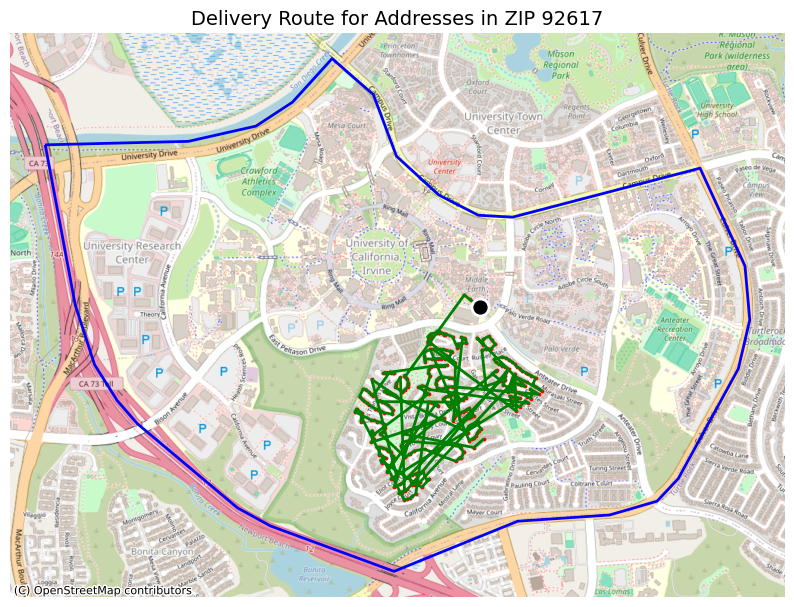

In [22]:
visit_order = [1,
 168,
 351,
 2,
 235,
 102,
 350,
 277,
 267,
 337,
 234,
 53,
 20,
 204,
 25,
 312,
 99,
 24,
 56,
 203,
 3,
 36,
 80,
 83,
 4,
 135,
 298,
 48,
 130,
 76,
 180,
 184,
 316,
 237,
 152,
 179,
 74,
 347,
 7,
 330,
 300,
 287,
 331,
 196,
 28,
 57,
 77,
 29,
 55,
 136,
 5,
 252,
 118,
 166,
 290,
 191,
 92,
 293,
 11,
 137,
 98,
 266,
 226,
 6,
 108,
 219,
 15,
 23,
 116,
 100,
 178,
 189,
 223,
 185,
 81,
 153,
 304,
 198,
 8,
 243,
 183,
 310,
 241,
 94,
 295,
 9,
 67,
 296,
 262,
 111,
 10,
 127,
 39,
 286,
 21,
 161,
 155,
 341,
 17,
 195,
 164,
 278,
 291,
 12,
 13,
 167,
 279,
 124,
 35,
 305,
 93,
 119,
 169,
 210,
 33,
 231,
 147,
 319,
 173,
 18,
 158,
 14,
 150,
 19,
 105,
 16,
 85,
 44,
 288,
 311,
 228,
 187,
 217,
 245,
 275,
 281,
 246,
 251,
 276,
 303,
 193,
 254,
 160,
 22,
 344,
 32,
 146,
 340,
 239,
 117,
 333,
 52,
 315,
 112,
 221,
 230,
 78,
 132,
 26,
 335,
 271,
 65,
 82,
 91,
 126,
 301,
 224,
 289,
 220,
 97,
 27,
 274,
 225,
 30,
 176,
 63,
 103,
 120,
 257,
 211,
 332,
 317,
 59,
 122,
 37,
 186,
 31,
 62,
 255,
 233,
 272,
 69,
 334,
 218,
 128,
 250,
 87,
 229,
 214,
 194,
 329,
 68,
 222,
 268,
 192,
 209,
 285,
 66,
 58,
 64,
 212,
 259,
 114,
 208,
 302,
 199,
 207,
 162,
 60,
 215,
 113,
 131,
 342,
 54,
 197,
 34,
 143,
 149,
 50,
 284,
 200,
 86,
 322,
 90,
 248,
 352,
 338,
 109,
 38,
 79,
 240,
 123,
 325,
 216,
 121,
 40,
 261,
 327,
 125,
 282,
 323,
 84,
 51,
 292,
 264,
 188,
 106,
 171,
 181,
 41,
 145,
 154,
 256,
 260,
 42,
 309,
 43,
 101,
 236,
 144,
 163,
 156,
 73,
 242,
 247,
 45,
 140,
 129,
 345,
 46,
 75,
 151,
 270,
 159,
 142,
 202,
 104,
 353,
 47,
 244,
 110,
 170,
 336,
 313,
 232,
 138,
 177,
 324,
 148,
 283,
 314,
 71,
 265,
 190,
 326,
 318,
 49,
 294,
 133,
 297,
 115,
 213,
 107,
 263,
 182,
 172,
 349,
 307,
 346,
 253,
 61,
 320,
 205,
 280,
 201,
 308,
 70,
 89,
 348,
 72,
 174,
 339,
 141,
 206,
 299,
 165,
 134,
 249,
 88,
 175,
 273,
 227,
 306,
 95,
 238,
 157,
 343,
 96,
 328,
 321,
 139,
 269,
 258]
visit_order = [str(num) for num in visit_order]
plot_route(gdf_points, visit_order)

## Animate Visit Route Order